In [35]:
import pandas as pd

df=pd.read_csv('Data.csv')
print(df)

      Country   Age   Salary Purchased
0       India  34.0  92000.0       Yes
1   Sri lanka  22.0  25000.0       Yes
2       China  31.0  74000.0       Yes
3   Sri lanka  29.0      NaN        No
4       China  55.0  98000.0       Yes
5       India  24.0  30000.0        No
6   Sri lanka  28.0  40000.0        No
7       India   NaN  60000.0        No
8       China  51.0  89000.0       Yes
9       India  44.0  78000.0       Yes
10  Sri lanka  21.0  20000.0        No
11      China  25.0  30000.0       Yes
12      India  33.0  45000.0       Yes
13      India  42.0  65000.0       Yes
14  Sri lanka  33.0  22000.0        No


In [61]:
# columns_with_missing = ['Age','Salary']
df = df.dropna()
print(df)

      Country   Age   Salary  Purchased_Yes
0       India  34.0  92000.0              1
1   Sri lanka  22.0  25000.0              1
2       China  31.0  74000.0              1
4       China  55.0  98000.0              1
5       India  24.0  30000.0              0
6   Sri lanka  28.0  40000.0              0
8       China  51.0  89000.0              1
9       India  44.0  78000.0              1
10  Sri lanka  21.0  20000.0              0
11      China  25.0  30000.0              1
12      India  33.0  45000.0              1
13      India  42.0  65000.0              1
14  Sri lanka  33.0  22000.0              0


In [62]:
print(df)

      Country   Age   Salary  Purchased_Yes
0       India  34.0  92000.0              1
1   Sri lanka  22.0  25000.0              1
2       China  31.0  74000.0              1
4       China  55.0  98000.0              1
5       India  24.0  30000.0              0
6   Sri lanka  28.0  40000.0              0
8       China  51.0  89000.0              1
9       India  44.0  78000.0              1
10  Sri lanka  21.0  20000.0              0
11      China  25.0  30000.0              1
12      India  33.0  45000.0              1
13      India  42.0  65000.0              1
14  Sri lanka  33.0  22000.0              0


In [93]:
df=pd.get_dummies(df,columns=['Purchased_Yes_1','Country'],drop_first=True)

In [94]:
print(df)

     Age   Salary  Purchased_Yes_1_1  Country_India  Country_Sri lanka
0   34.0  92000.0                  1              1                  0
1   22.0  25000.0                  1              0                  1
2   31.0  74000.0                  1              0                  0
4   55.0  98000.0                  1              0                  0
5   24.0  30000.0                  0              1                  0
6   28.0  40000.0                  0              0                  1
8   51.0  89000.0                  1              0                  0
9   44.0  78000.0                  1              1                  0
10  21.0  20000.0                  0              0                  1
11  25.0  30000.0                  1              0                  0
12  33.0  45000.0                  1              1                  0
13  42.0  65000.0                  1              1                  0
14  33.0  22000.0                  0              0                  1


In [66]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [68]:
X = df.drop('Purchased_Yes_1', axis=1) #independent variables-features
y = df['Purchased_Yes_1']   # targets

In [69]:
numerical_cols = ['Age', 'Salary']
categorical_cols = ['Country']

In [71]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [72]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [73]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [74]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [75]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Salary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Country'])])),
                ('classifier', RandomForestClassifier())])

In [78]:
y_pred = clf.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [80]:
print(df)

      Country   Age   Salary  Purchased_Yes_1
0       India  34.0  92000.0                1
1   Sri lanka  22.0  25000.0                1
2       China  31.0  74000.0                1
4       China  55.0  98000.0                1
5       India  24.0  30000.0                0
6   Sri lanka  28.0  40000.0                0
8       China  51.0  89000.0                1
9       India  44.0  78000.0                1
10  Sri lanka  21.0  20000.0                0
11      China  25.0  30000.0                1
12      India  33.0  45000.0                1
13      India  42.0  65000.0                1
14  Sri lanka  33.0  22000.0                0


In [81]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [84]:
import matplotlib.pyplot as plt

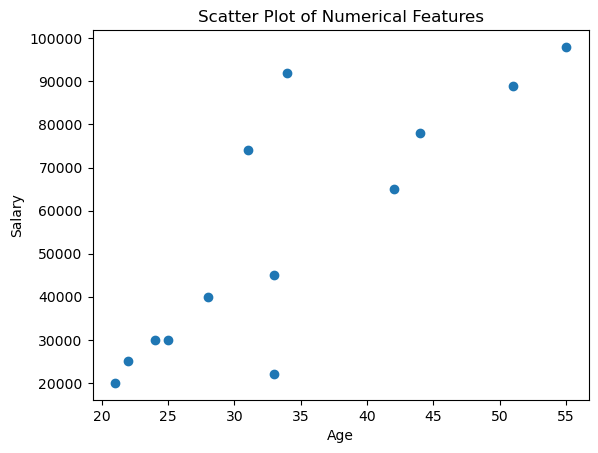

In [91]:
# Example: Creating a scatter plot of two numerical features
plt.scatter(df['Age'], df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter Plot of Numerical Features')
plt.show()


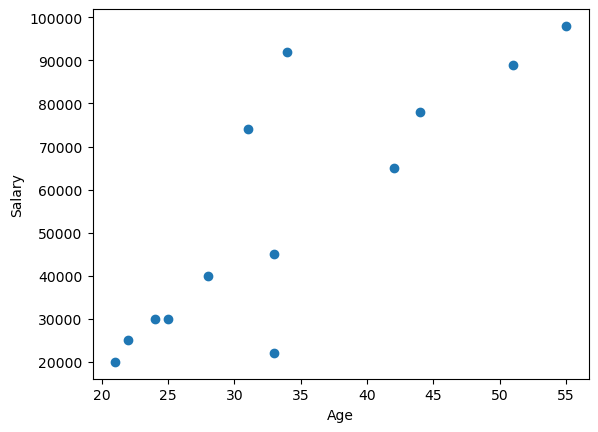

In [96]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'],df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()